In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%pyplot inline
import math

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
UsageError: Line magic function `%pyplot` not found.


In [2]:
original = pd.read_csv('BTCUSD_2018_1min.csv',index_col=False,usecols=['UnixTime','High'])

print(original.head())
original.describe()

      High    UnixTime
0  3692.35  1546300740
1  3686.38  1546300680
2  3686.38  1546300620
3  3686.38  1546300560
4  3685.70  1546300500


,High,UnixTime
count,490107.000000,4.901070e+05
mean,7741.778537,1.529674e+09
std,2336.980611,8.802341e+06
min,3129.600000,1.514765e+09
25%,6409.340000,1.522116e+09
50%,7100.090000,1.529468e+09
75%,8752.740000,1.537049e+09
max,17236.460000,1.546301e+09


In [2]:
mad_map = pd.read_csv('BTCUSD_2018_Changed.csv',index_col=False,usecols=['High'])
print(mad_map.head())
mad_map.describe()

      High
0  3692.35
1  3686.38
2  3686.38
3  3686.38
4  3685.70


,High
count,490107.000000
mean,7741.778537
std,2336.980611
min,3129.600000
25%,6409.340000
50%,7100.090000
75%,8752.740000
max,17236.460000


In [4]:
# col = ['UnixTime','UnixTime']
# mapped = mad_map.merge(original,on=col,how='inner')
# mapped.head()

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(original,mad_map)

In [6]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100)
rf.fit(X_train,Y_train)

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [12]:
print(rf.feature_importances_)
print(rf.oob_score_)
y = rf.predict(X_test)


[9.99994282e-01 5.71753221e-06]
0.9999999980375428


In [13]:
y

array([ 8635.1493,  6303.2899,  6693.03  , ..., 11175.1298,  8180.    ,
        6505.0474])

In [14]:
print(metrics.mean_absolute_error(Y_test,y))
print(metrics.mean_squared_error(Y_test,y))
print(math.sqrt(metrics.mean_squared_error(Y_test,y)))

0.018309501318000684
0.01395254745996695
0.11812090187586172


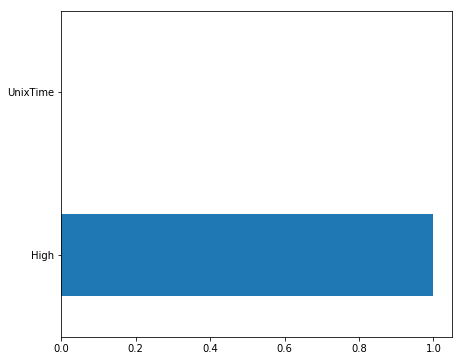

In [17]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh',figsize=(7,6))

In [3]:
ori1 = pd.read_csv('BTCUSD_2018_1min.csv',index_col=False,usecols=['UnixTime','Volume','High'])
ori1.head()

,High,Volume,UnixTime
0,3692.35,4.107691,1546300740
1,3686.38,0.117334,1546300680
2,3686.38,0.089801,1546300620
3,3686.38,8.244595,1546300560
4,3685.70,3.279082,1546300500


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(ori1,mad_map)
rf = RandomForestRegressor(oob_score=True, n_estimators=100)
rf.fit(X_train,Y_train)
print(rf.feature_importances_)
print(rf.oob_score_)
y = rf.predict(X_test)
print(metrics.mean_absolute_error(Y_test,y))
print(metrics.mean_squared_error(Y_test,y))
# print(math.sqrt(metrics.mean_squared_error(Y_test,y)))

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[9.99993292e-01 1.36053016e-09 6.70698466e-06]
0.9999999975714626
0.019336615594980885
0.00729429342909648


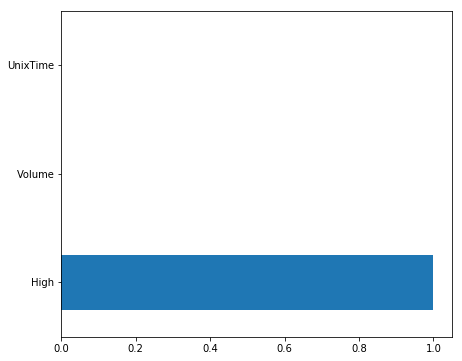

In [8]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh',figsize=(7,6))